In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '/Users/shubhamkapadnis/Downloads/Online Retail.csv'

Customer Segmentation is a way to split customers into groups based on certain characteristics.
Segmentation allows marketers to better tailor their marketing efforts to various audience subsets. Those efforts can relate to both communications and product development.
Using RFM method for customer segmentation.

RFM(Recency, Frequency, Monetary) is a method where customers are indentified based on recency of their last purchase(recency), the total number of purchases they made(frequency) and the amount they have spent(monetary). This method is often used to identify High-Vale Customer(HVCs)

In [5]:
# loading the data
cust_df = pd.read_csv(path)
cust_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Attribute Information:
1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation.
2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product (item) name. Nominal.
4. Quantity: The quantities of each product (item) per transaction. Numeric.
5. InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
6. UnitPrice: Unit price. Numeric, Product price per unit in sterling.
7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
8. Country: Country name. Nominal, the name of the country where each customer resides.

In [6]:
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [7]:
cust_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [8]:
#shape of the dataset
cust_df.shape

(541909, 8)

In [9]:
#check the datatypes of the features
cust_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
cust_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The dataset contains few null values in the Description and CustomerID column.
The Quantity and UnitPrice show minimum values as negative. This could be due to cancelled orders.
The data is skewed as there is large difference between 75th percentile and maximum value for Quantity and UnitPrice columns.

In [12]:
#check for the duplicated records
cust_df.duplicated().sum()

5268

In [13]:
#check for the missing values
cust_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
#drop duplicate and missing values
cust_df.drop_duplicates(inplace=True)
cust_df.dropna(inplace=True)

In [15]:
#check for the duplicated records again
cust_df.duplicated().sum()

0

In [16]:
#check for the missing values again 
cust_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
# check the shape of the dataset
cust_df.shape

(401604, 8)

In [19]:
# check for order cancellations
cust_df[cust_df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


There are 8872 records where the orders are cancelled and the quantity contains a negative value.
Dropping those records.

In [21]:
# consider only the non cancelled orders
cust_df = cust_df[~cust_df['InvoiceNo'].str.startswith('C')]

# check the shape of the data after removing cancelled orders
cust_df.shape

(392732, 8)

In [22]:
# description of the dataset
cust_df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


Still the minimum value for the UnitPrice is 0 which can't be real as store cannot sell items for free

In [23]:
cust_df[cust_df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/10 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/10 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/10 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/11 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/11 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/11 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/11 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/11 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/11 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/11 14:42,0.0,14410.0,United Kingdom


There are few records having UnitPrice as 0. Dropping those records

In [25]:
#considering UnitPrice greater than zero
cust_df = cust_df[cust_df['UnitPrice'] > 0]

In [27]:
#shape of the dataset
cust_df.shape

(392692, 8)

In [68]:
from datetime import datetime, timedelta
import datetime as dt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [18,7]
sns.set(rc={'figure.figsize':(18,7)})

Use Feature Engineering to create new variables that aren't in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

In [29]:
#convert InvoiceDate column into datetine format
cust_df['InvoiceDate'] = pd.to_datetime(cust_df['InvoiceDate'],format= '%m/%d/%y %H:%M')

In [30]:
#create new features from the InvoiceDate column
cust_df['day'] = cust_df['InvoiceDate'].dt.day_name()
cust_df['year'] = cust_df['InvoiceDate'].apply(lambda x: x.year)
cust_df['month_num'] = cust_df['InvoiceDate'].apply(lambda x: x.month)
cust_df['day_num'] = cust_df['InvoiceDate'].apply(lambda x: x.day)
cust_df['hour'] = cust_df['InvoiceDate'].apply(lambda x: x.hour)
cust_df['minute'] = cust_df['InvoiceDate'].apply(lambda x: x.minute)
cust_df['month'] = cust_df['InvoiceDate'].dt.month_name()

In [31]:
#create TotalAmount from Quantity and UnitPrice
cust_df['TotalAmount'] = cust_df['Quantity'] * cust_df['UnitPrice']

In [32]:
# top 5 rows of the data
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34


Exploratory Data Analysis (EDA)

In [33]:
#count of each product description
desc_df = cust_df['Description'].value_counts().reset_index()
desc_df.columns=['Description Name', 'Count']
desc_df.head()

,Description Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


Text(0.5, 1.0, 'Top 5 most sold products')

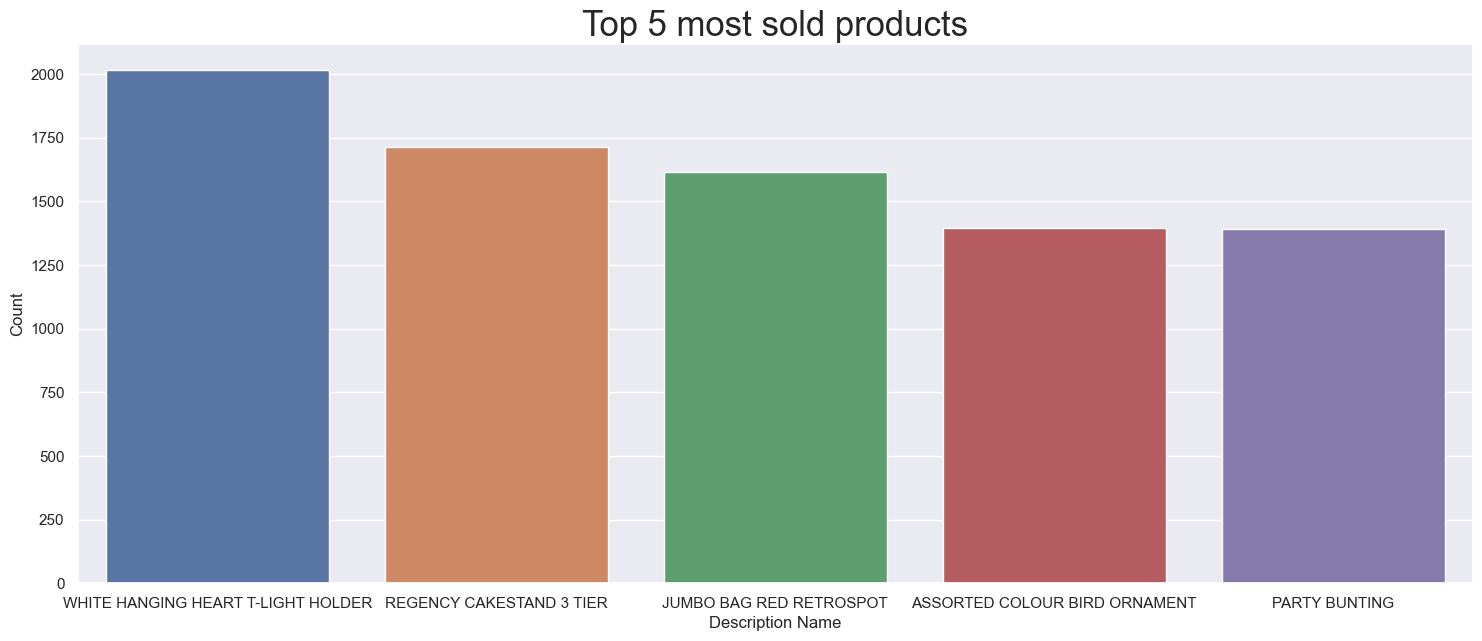

In [42]:
#plot the top 5 most sold products
sns.barplot(x= 'Description Name', y= 'Count', data= desc_df[:5])
plt.title("Top 5 most sold products",fontsize = 25)

Text(0.5, 1.0, 'Top 5 least sold products')

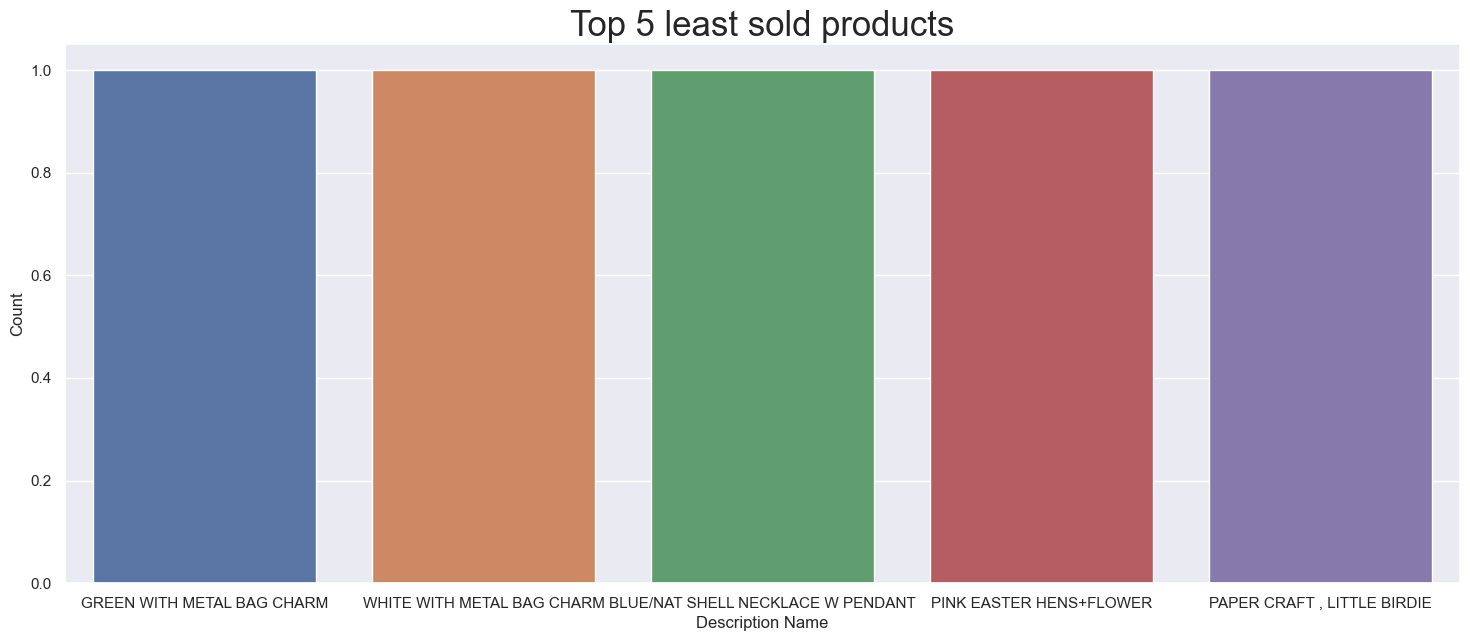

In [43]:
#plot the top 5 least sold products
sns.barplot(x='Description Name', y='Count', data=desc_df[-5:])
plt.title('Top 5 least sold products',fontsize = 25)


In [44]:
#count of customers for each country
country_df = cust_df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country Name'}, inplace=True)
country_df.rename(columns={'Country':'Count'}, inplace=True)
country_df.head()

,Country Name,Count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


Text(0.5, 1.0, 'Top 5 country based on the number of customers')

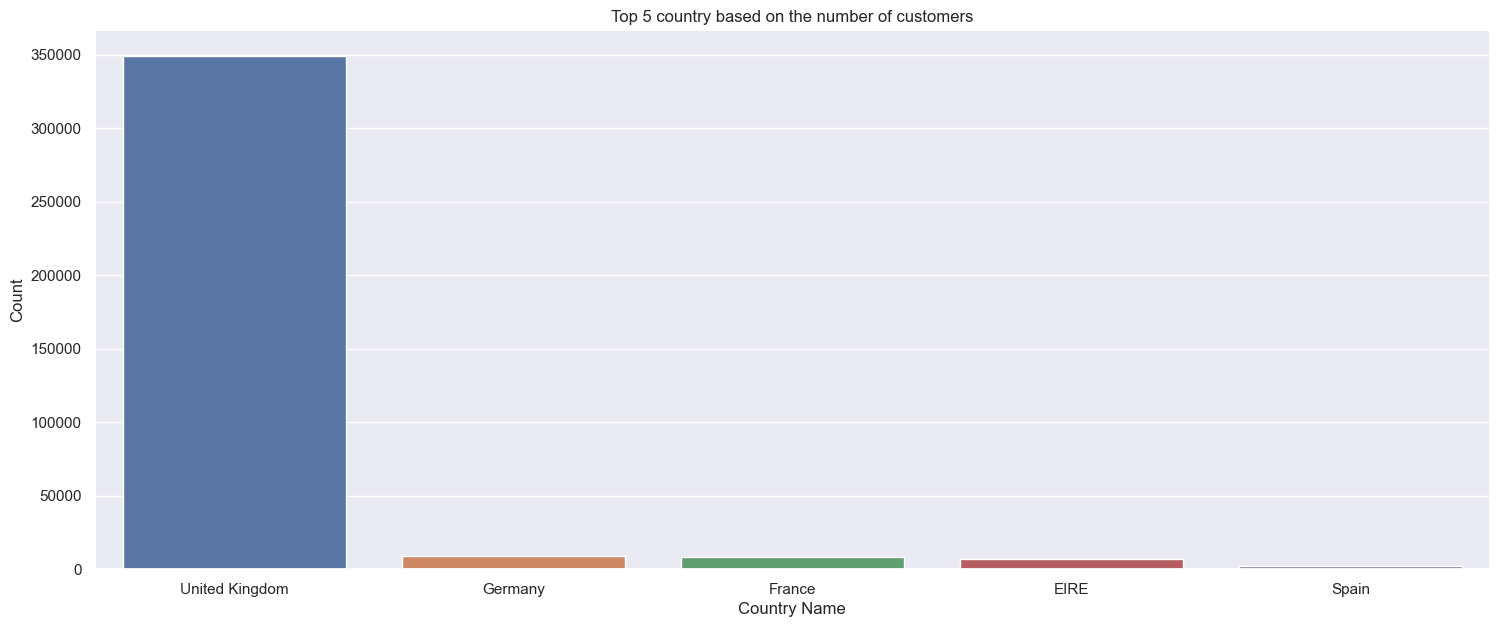

In [45]:
#plot the top 5 country based on the number of customers
sns.barplot(x='Country Name', y='Count', data=country_df[:5])
plt.title('Top 5 country based on the number of customers')

As it is an UK based company, large portion of the customers are from United Kingdom only.

In [46]:
#number of unique customers
len(cust_df['CustomerID'].unique())

4338

In [47]:
#order share of top 10 customers
share_df = (cust_df['CustomerID'].value_counts()/sum(cust_df['CustomerID'].value_counts()) * 100).reset_index()
share_df.columns = ['Customer ID', 'Order Share']
share_df.head(10).cumsum()

,Customer ID,Order Share
0,17841.0,1.954713
1,32752.0,3.398592
2,46848.0,4.700121
3,59596.0,5.823648
4,74202.0,6.505353
5,89513.0,7.107861
6,104159.0,7.636519
7,117248.0,8.098459
8,130511.0,8.522965
9,144809.0,8.939831


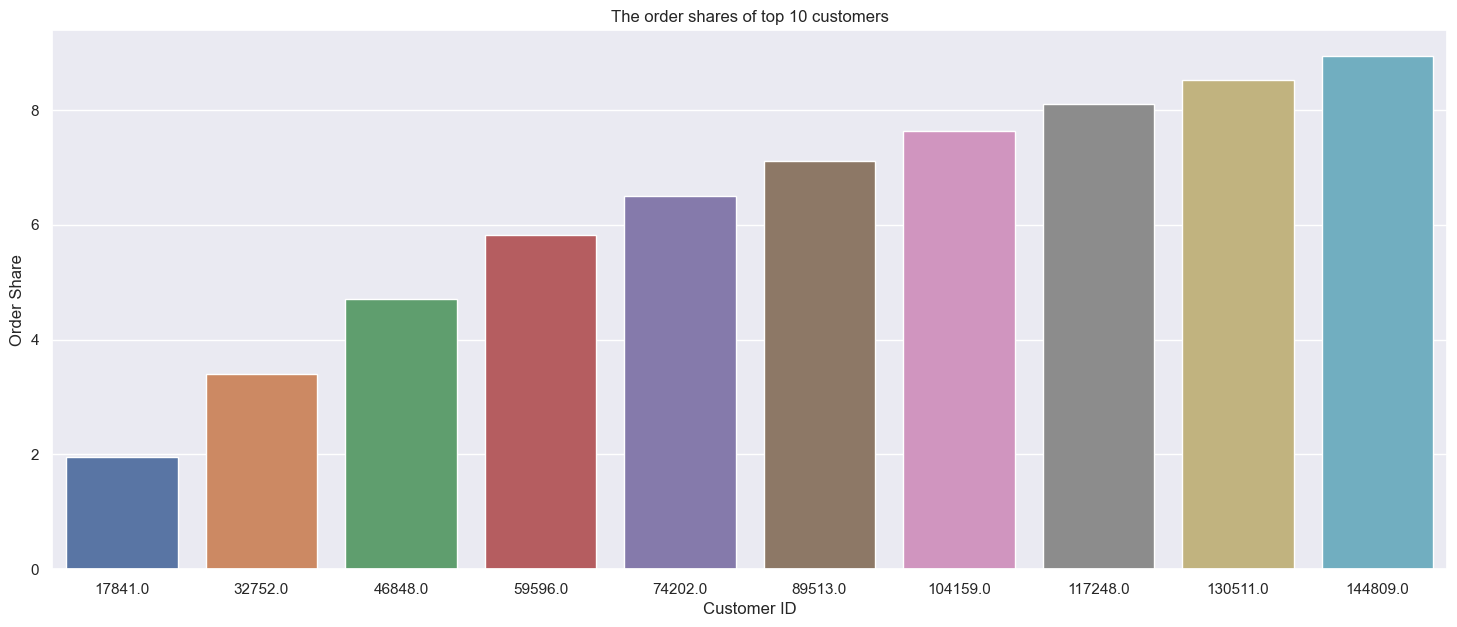

In [48]:
#plot the top 10 customer's order share
sns.barplot(x='Customer ID', y='Order Share', data=share_df[:10].cumsum())
plt.title('The order shares of top 10 customers')
plt.show()

Only 10 customers out of 4338 unique customers are responsible for approx 9% of the total orders.these customers might be wholesalers.

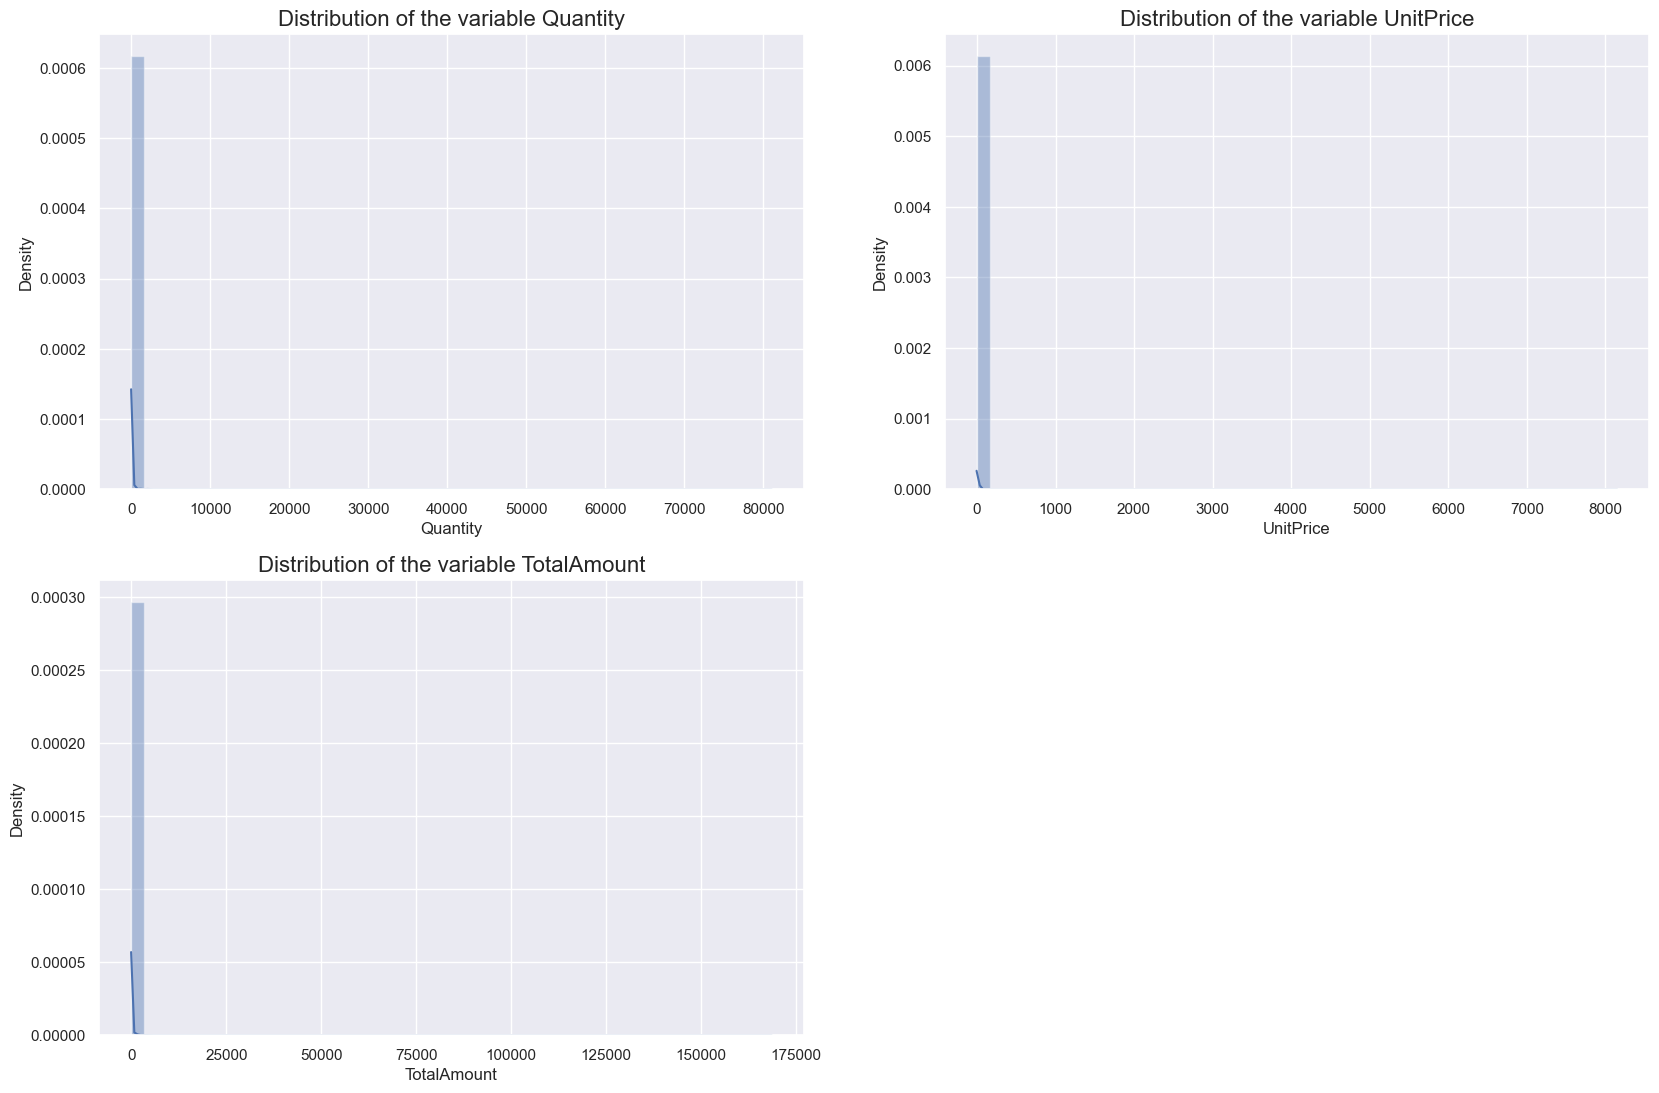

In [49]:
#plot the distribution of numeric features
num_features = ['Quantity', 'UnitPrice','TotalAmount']
count = 1
plt.subplots(figsize= (20,13))
for feature in num_features:
    plt.subplot(2,2,count)
    sns.distplot(cust_df[feature])
    plt.title(f"Distribution of the variable {feature}", fontsize=16)
    plt.xlabel(f"{feature}")
    plt.ylabel("Density")
    count += 1

The distribution of all the variables are heavily right skewed. Applying log transformation on these variables to make it less skewed.

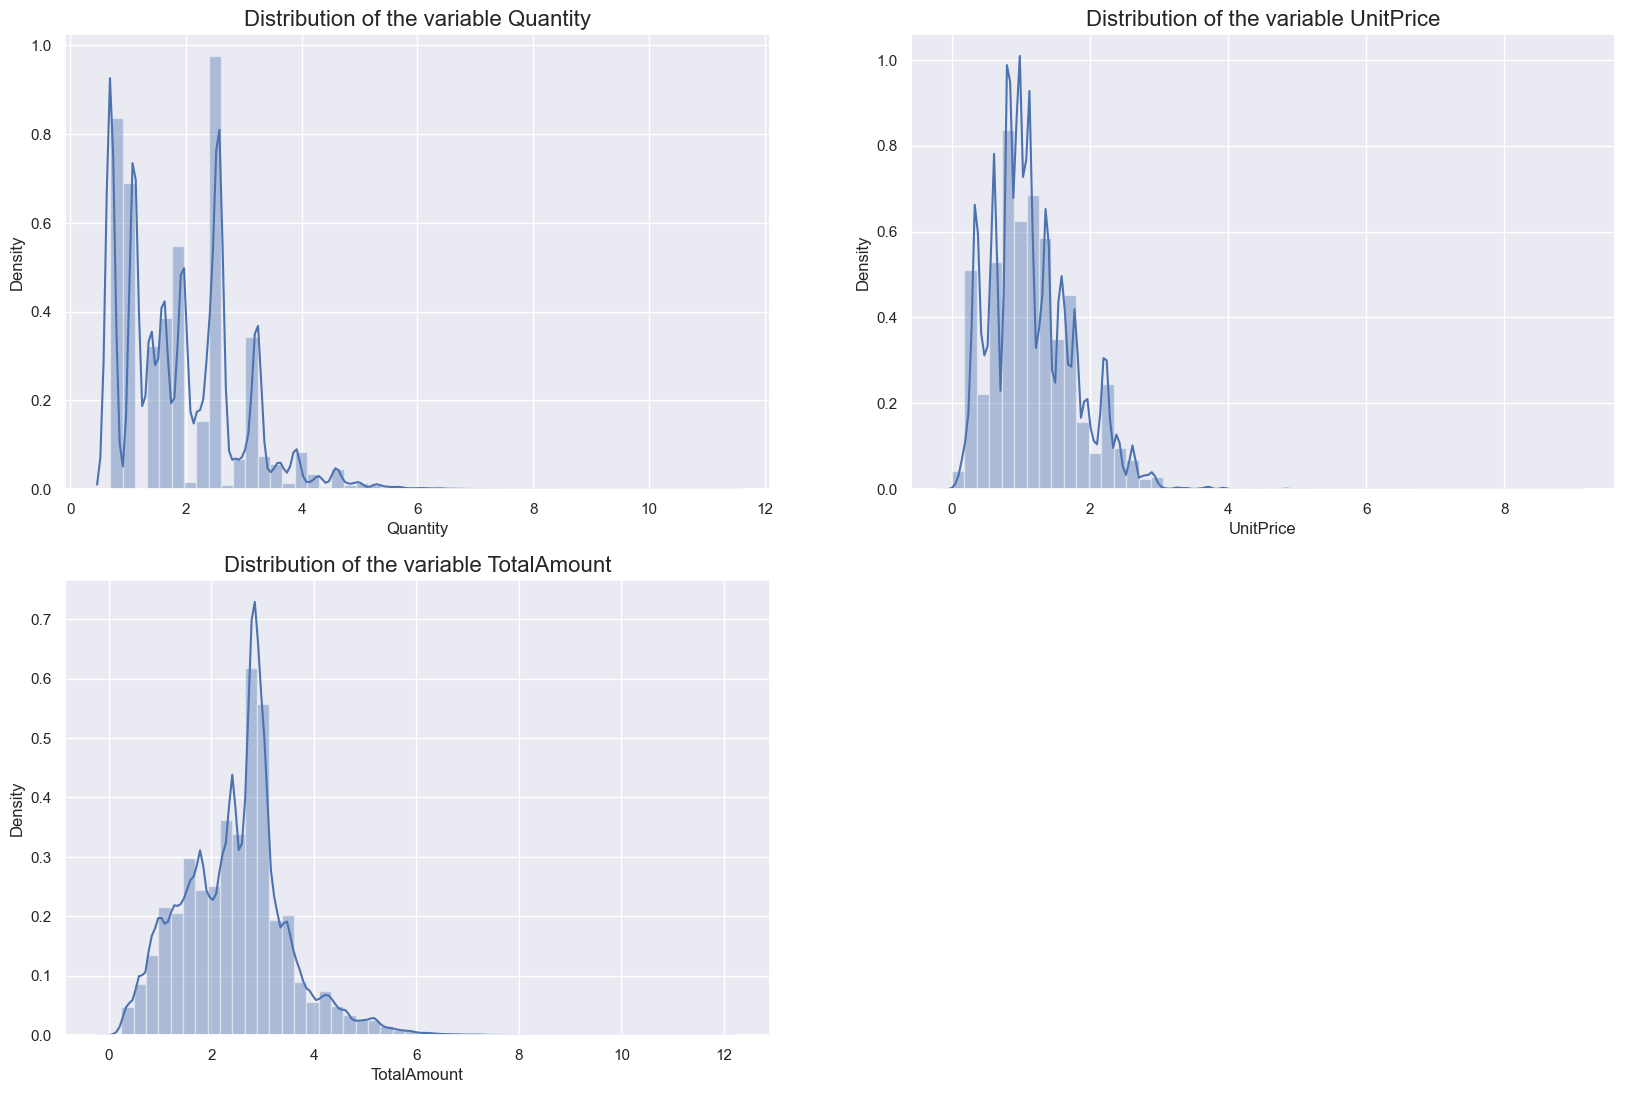

In [51]:
# taking a log transformation
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
    plt.subplot(2,2,count)
    sns.distplot(np.log1p(cust_df[feature]))
    plt.title(f"Distribution of the variable {feature}", fontsize=16)
    plt.xlabel(f"{feature}")
    plt.ylabel("Density")
    count += 1

The variables after log transformation are less skewed than before

In [52]:
#number of purchases w.r.t the day of the week
day_df = cust_df['day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day Name'}, inplace=True)
day_df.rename(columns={'day': 'Count'}, inplace=True)
day_df

,Day Name,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


In [53]:
#number of purchases w.r.t month
month_df = cust_df['month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
month_df

,Month Name,Count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


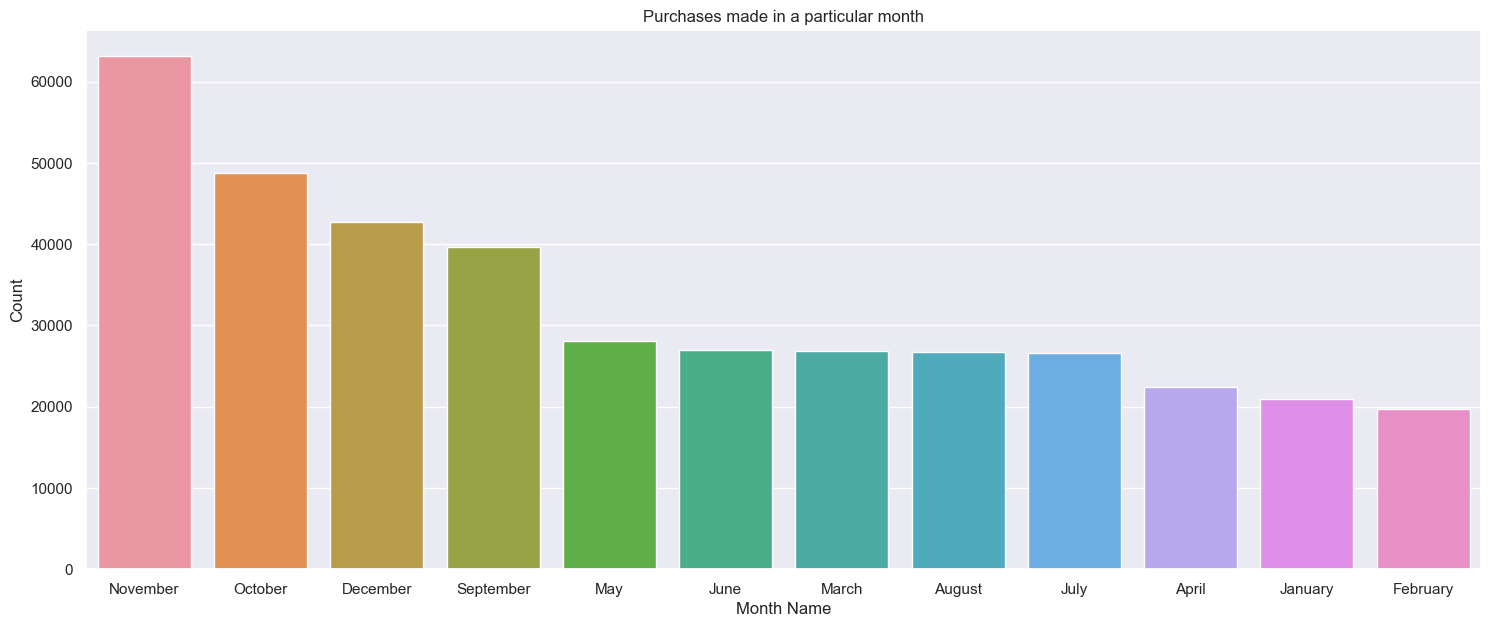

In [54]:
#plot the number of purchases w.r.t month
sns.barplot(x='Month Name', y='Count', data=month_df)
plt.title('Purchases made in a particular month')
plt.show()

The most number of purchases are made during October to December which is a festive season for many people.

In [55]:
#number of purchases w.r.t hour of the day
hour_df = cust_df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour Name,Count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


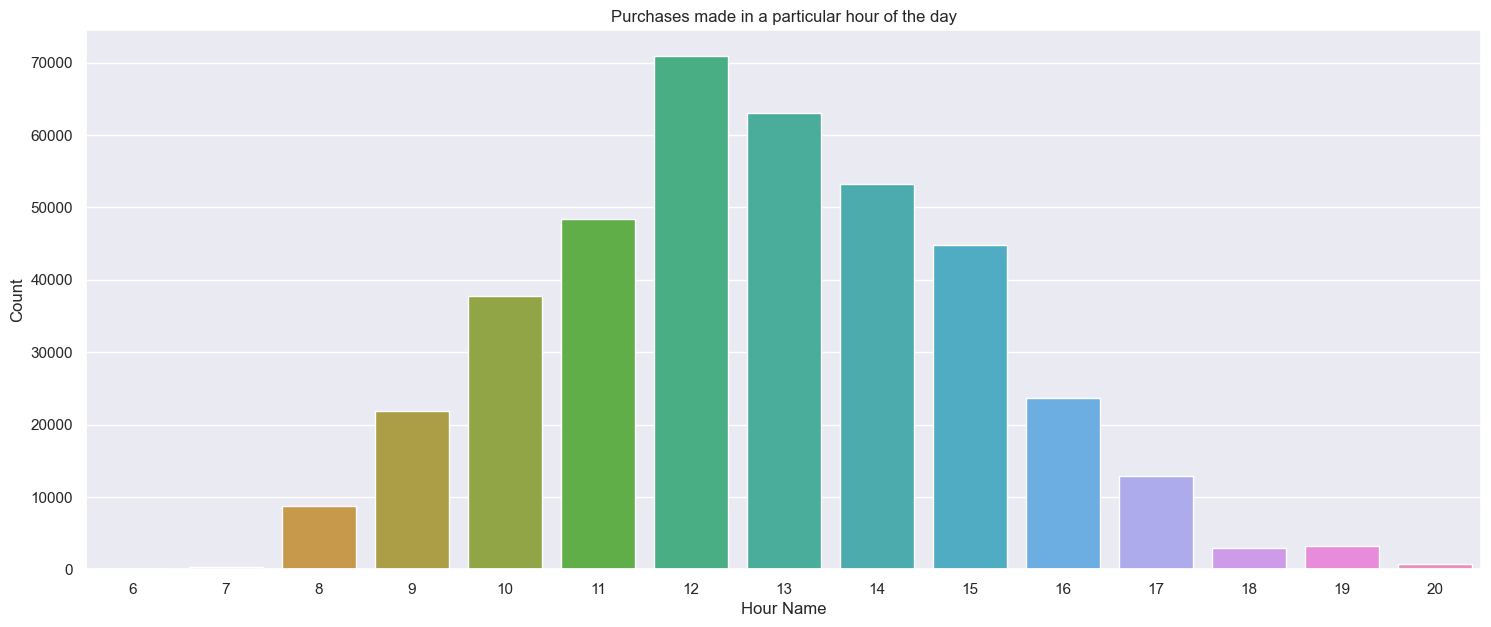

In [56]:
#plot the number of purchases w.r.t hour of the day
sns.barplot(x='Hour Name', y='Count', data=hour_df)
plt.title('Purchases made in a particular hour of the day')
plt.show()

RFM Customer Segmentation Model

As the large chunk of customers are from UK, so considering only the UK customers for the customer segmentation.

In [57]:
# filter UK data only
cust_df = cust_df[cust_df['Country'] == 'United Kingdom']

# print the shape of the data
cust_df.shape

(349203, 16)

In [75]:
#calculating the latest date as the last invoice date was '2011-12-09'
latest_date = cust_df['InvoiceDate'].max()
latest_date = latest_date + timedelta(days=1)

In [76]:
latest_date

Timestamp('2011-12-10 12:49:00')

In [77]:
# create rfm modeling scores for each customer
rfm_df = cust_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: x.count(), 'TotalAmount': lambda x: x.sum()})
# convert invoice date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)
# rename columns to frequency, recency, monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,1,4412,33053.19
3,12749.0,4,199,4090.88
4,12820.0,3,59,942.34


In [78]:
# descriptive stats of the rfm dataframe
rfm_df.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.208418,89.082398,1858.424654
std,99.533854,214.034542,7478.631256
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,298.185000
50%,51.000000,40.000000,644.975000
75%,143.000000,98.000000,1571.285000
max,374.000000,7676.000000,259657.300000


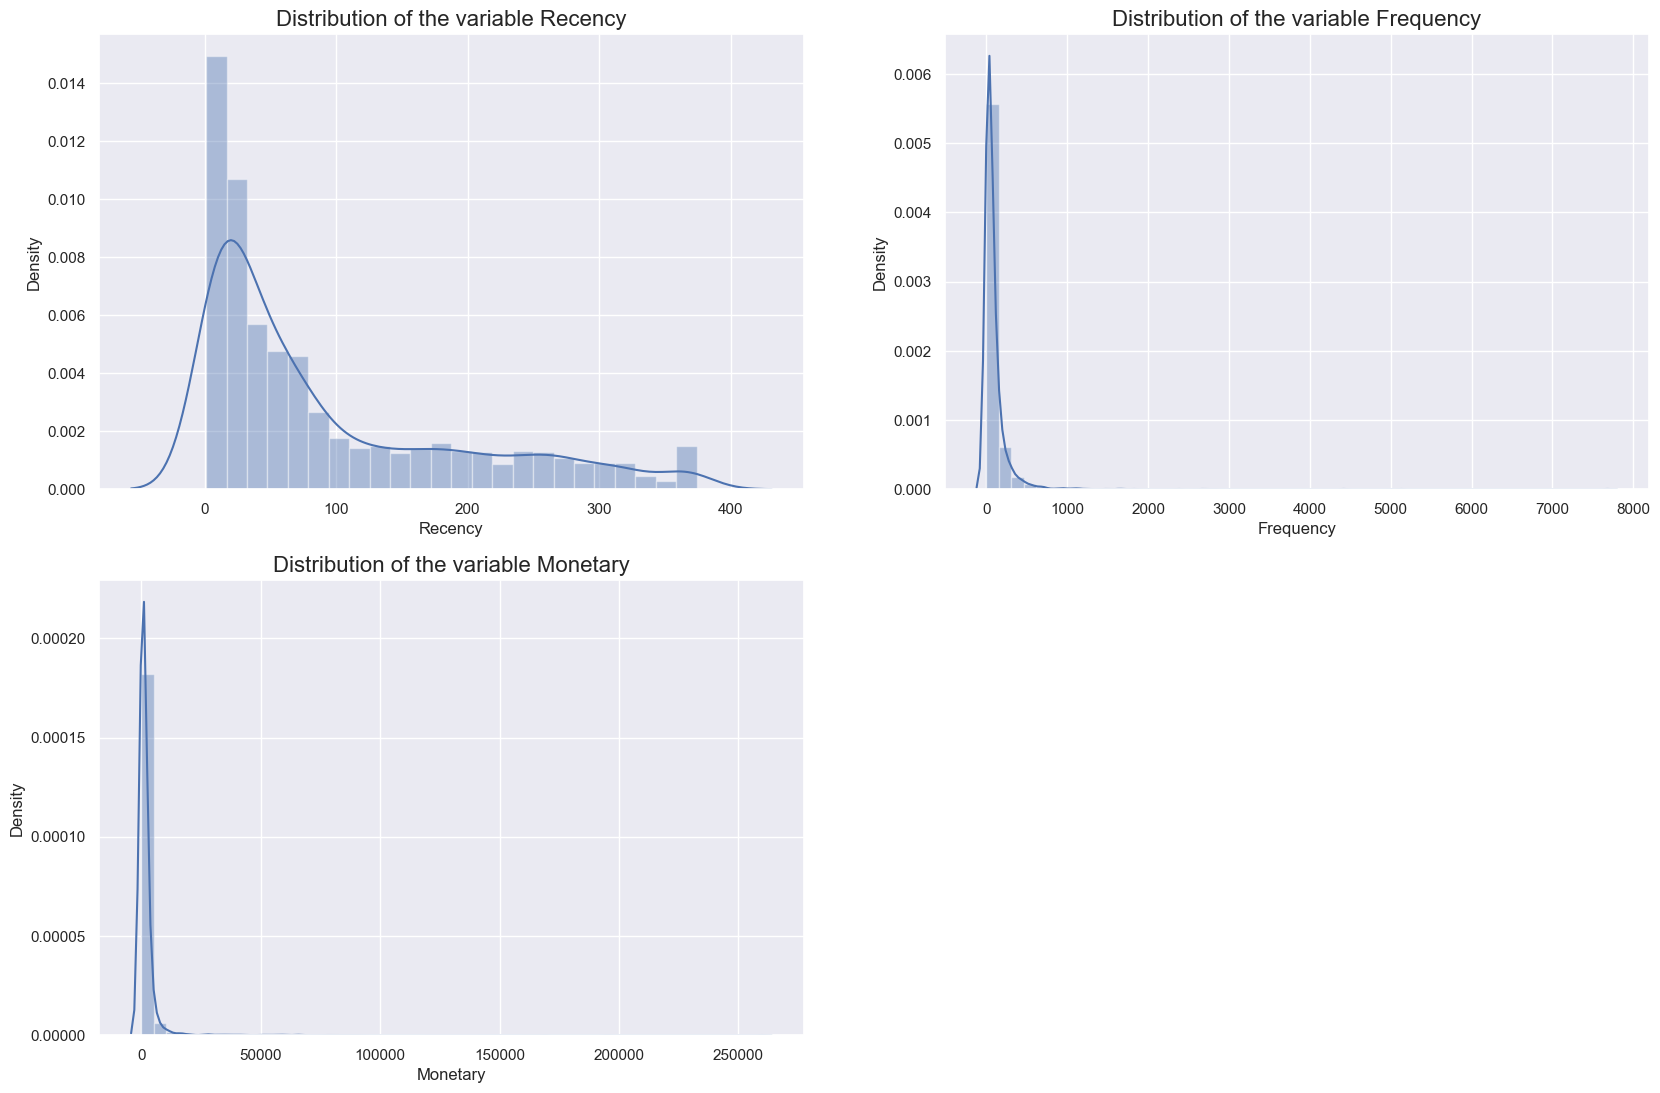

In [79]:
# plot the distribution of the RFM values
count = 1
plt.subplots(figsize=(20,13))
for feature in rfm_df:
  plt.subplot(2,2,count)
  sns.distplot(rfm_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

In [80]:
# treat the negative and zero values to handle infinite numbers during log transformation
def handle_negative(num):
  if num <= 0:
    return 1
  else:
    return num

# apply the function to recency and monetary columns
rfm_df['Recency'] = [handle_negative(x) for x in rfm_df['Recency']]
rfm_df['Monetary'] = [handle_negative(x) for x in rfm_df['Monetary']]

# apply log transfomation to RFM values
log_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

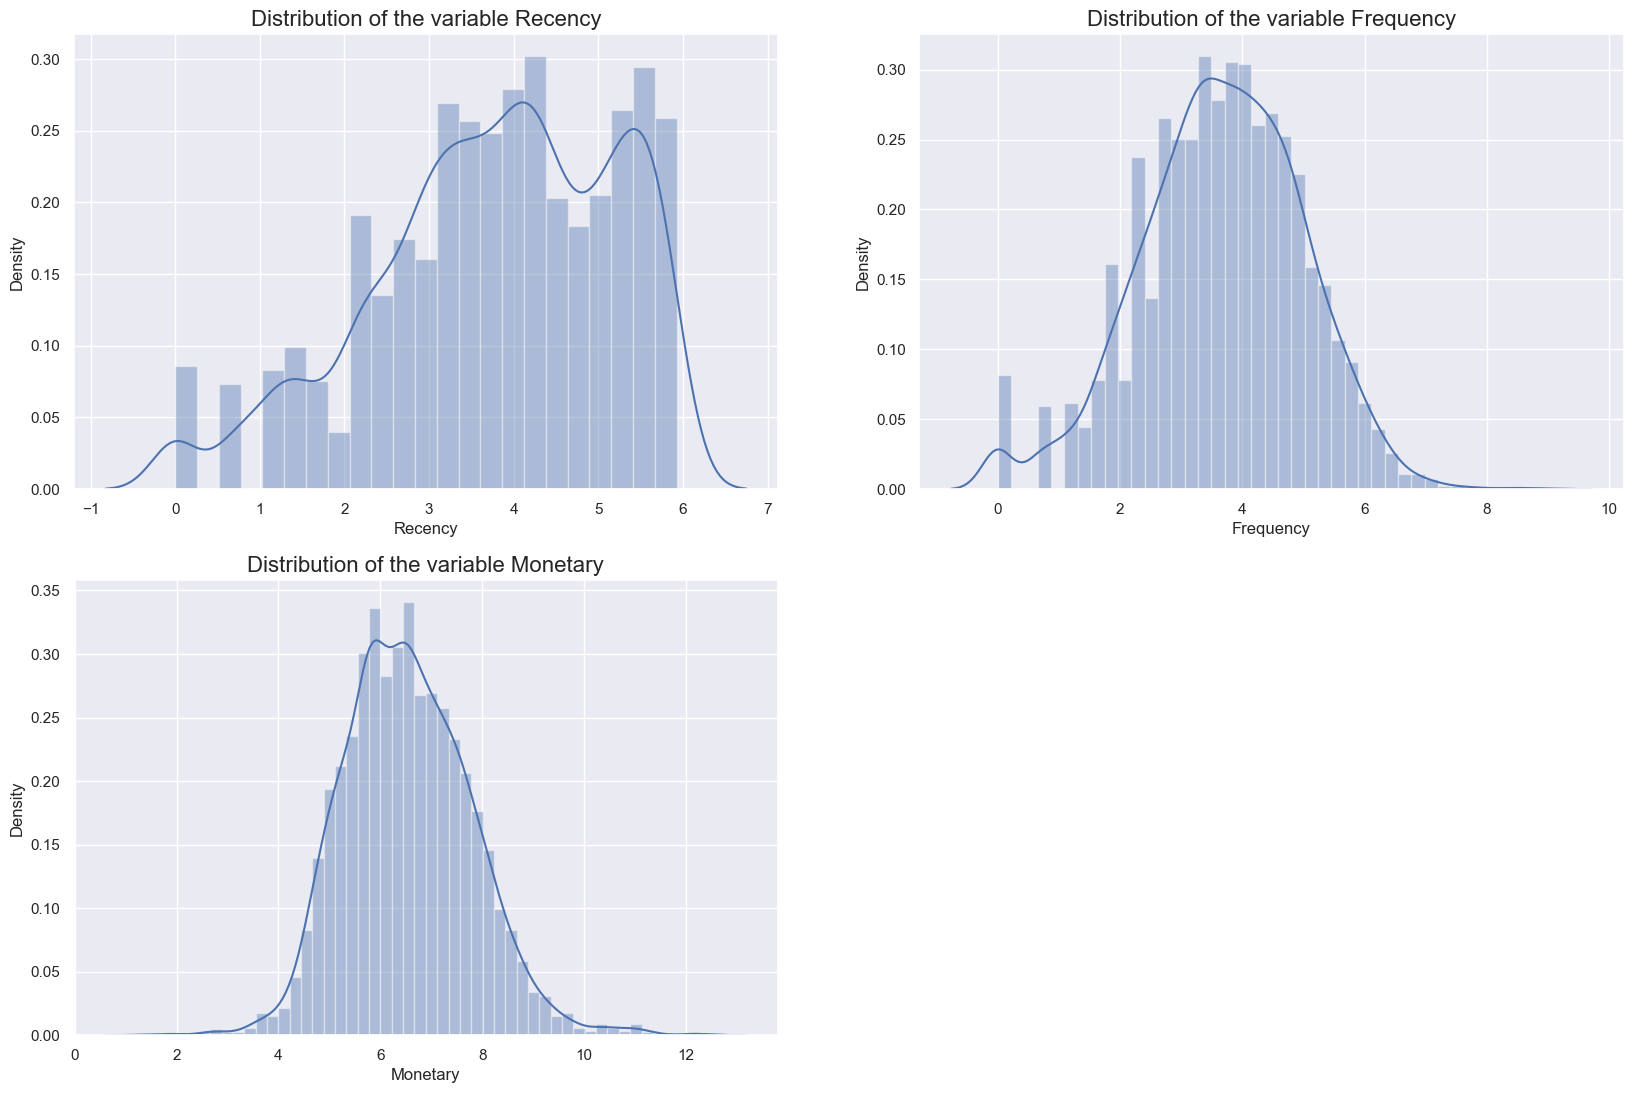

In [81]:
# plot the log transformed distribution
count = 1
plt.subplots(figsize=(20,13))
for feature in log_df:
  plt.subplot(2,2,count)
  sns.distplot(log_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

In [83]:
import math
# apply log transformation on the original rfm dataframe
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [84]:
features = ['Recency_log', 'Frequency_log', 'Monetary_log']

# scaling our data
X_features = rfm_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

Implementing K-Means Clustering.

Applying Elbow method on Recency, Frequency and Monetary

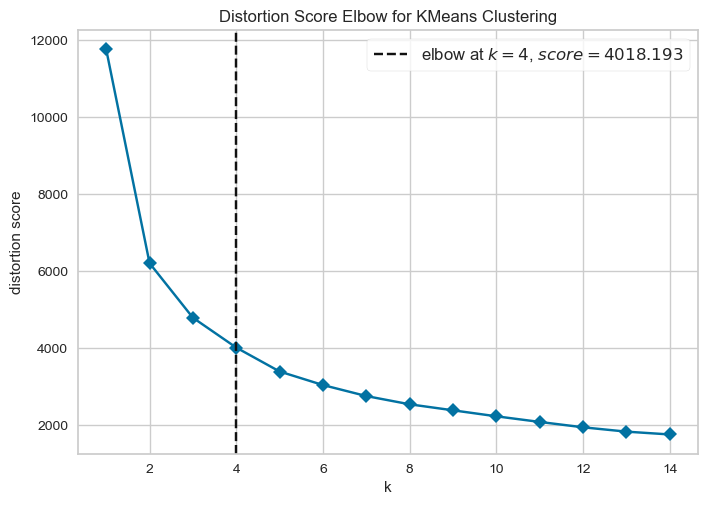

In [85]:
# elbow method to find out the best k
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(X)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()

From the elbow method we reach the conclusion that the optimal number of clusters is 4 for Recency, Frequency and Monetary values.
We will again run the model with number of clusters as 4.

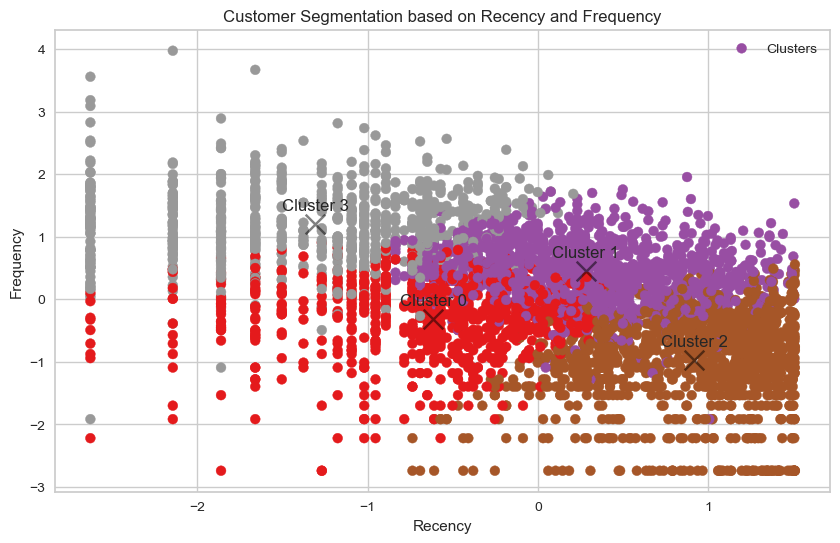

In [86]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X is your data array
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_km = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')

# Plot and annotate the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [87]:
# split the rfm values into four quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [88]:
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 143.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'Monetary': {0.25: 298.18500000000006,
  0.5: 644.9749999999999,
  0.75: 1571.285},
 'Recency_log': {0.25: 2.8903717578961645,
  0.5: 3.9318256327243257,
  0.75: 4.962844630259907},
 'Frequency_log': {0.25: 2.833213344056216,
  0.5: 3.6888794541139363,
  0.75: 4.584967478670572},
 'Monetary_log': {0.25: 5.697714088709554,
  0.5: 6.469211008718629,
  0.75: 7.359648897891878}}

In [89]:
# function to create R, F, M segments
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [90]:
# calculate RFM segment values for each record
rfm_df['R'] = rfm_df['Recency'].apply(RScore, args=('Recency', quantiles, ))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScore, args=('Frequency', quantiles, ))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScore, args=('Monetary', quantiles, ))
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
0,12346.0,326,1,77183.60,5.786897,0.000000,11.253942,4,4,1
1,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1
2,12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1
3,12749.0,4,199,4090.88,1.386294,5.293305,8.316515,1,1,1
4,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2


In [91]:
# add RFM group column
rfm_df['RFMGroup'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# calculate RFM score from RFM group column
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
0,12346.0,326,1,77183.60,5.786897,0.000000,11.253942,4,4,1,441,9
1,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3
2,12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,111,3
3,12749.0,4,199,4090.88,1.386294,5.293305,8.316515,1,1,1,111,3
4,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,122,5


In [92]:
# find the clusters for the observations in the dataset
rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,,,,
12346.0,326,1,77183.60,5.786897,0.000000,11.253942,4,4,1,441,9,1
12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3,3
12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,111,3,3
12749.0,4,199,4090.88,1.386294,5.293305,8.316515,1,1,1,111,3,3
12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,122,5,3


In [93]:
# Group by cluster label and calculate mean
cluster_averages = rfm_df.groupby('Cluster').mean()
cluster_averages

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMScore
Cluster,,,,,,,,,,
0,24.206762,32.040312,493.530234,2.881587,3.224051,5.978870,1.638492,2.970091,3.070221,7.678804
1,85.553616,85.023275,1523.726378,4.165322,4.248790,7.043151,2.742311,1.906068,1.896093,6.544472
2,192.571310,14.931177,290.427555,5.077663,2.353813,5.408049,3.574627,3.635158,3.548922,10.758706
3,10.350404,275.301887,6364.152871,1.892701,5.244410,8.133374,1.159030,1.216981,1.183288,3.559299


Cluster 0:

Recency: Low (average around 24 days)
Frequency: Low (average around 32 transactions)
Monetary: Moderate (average around $493)
Interpretation: Customers in this cluster can be seen as 'Potential Loyalists' or 'Promising' customers. They have a balanced score in all three RFM metrics. These customers have the potential to become more valuable if properly engaged. Tailored marketing strategies, loyalty programs, and incentives to increase their purchase frequency and value can be effective.


Cluster 1:

Recency: Moderate (average around 85 days)
Frequency: Moderate (average around 85 transactions)
Monetary: Moderate (average around $1523)
Interpretation: Customers in this cluster can be seen as 'Potential Loyalists' or 'Promising' customers. They have a balanced score in all three RFM metrics. These customers have the potential to become more valuable if properly engaged. Tailored marketing strategies, loyalty programs, and incentives to increase their purchase frequency and value can be effective.


Cluster 2:

Recency: High (average around 192 days)
Frequency: Low (average around 14 transactions)
Monetary: Low (average around $290)
Interpretation: Customers in this cluster are likely to be 'At-Risk' or 'Lapsed' customers. They haven't made purchases recently, and when they did, they didn't do so very frequently and didn't spend much. These customers might have been one-time buyers or occasional shoppers. Engaging them with reactivation campaigns or exploring why they haven’t returned can be a strategic move.


Cluster 3:

Recency: Very Low (average around 10 days)
Frequency: Very High (average around 275 transactions)
Monetary: Very High (average around $6364)
Interpretation: This cluster represents your 'Champions' or 'Loyal' customers. They shop frequently, recently, and spend the most. They are the most valuable segment, likely to respond positively to new offers, up-sell and cross-sell opportunities. Maintaining their high engagement level is crucial, and they can also be targeted for feedback or as brand ambassadors.
